In [1]:
import numpy as np
import pandas as pd

In [2]:
language_raw = pd.read_csv('../streamlit_public/Input/LanguageDetection.csv')
language_raw.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


<AxesSubplot: ylabel='Language'>

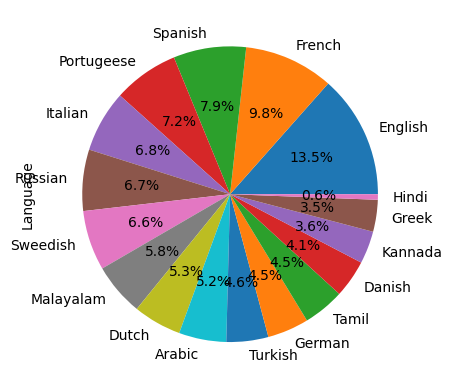

In [21]:
language_raw.Language.value_counts().plot.pie(autopct='%.1f%%')

In [7]:
language_raw.isnull().sum()

Text        0
Language    0
dtype: int64

In [8]:
language_raw.Language.nunique()

17

In [9]:
language_raw.shape

(10337, 2)

In [10]:
language_raw[language_raw.duplicated()]

,Text,Language
1141,i'm sorry.,English
1180,oh my god.,English
1196,i'm sorry.,English
1724,എന്നോട് ക്ഷമിക്കൂ.,Malayalam
1767,ഓ എന്റെ ദൈവമേ.,Malayalam
...,...,...
9706,Ach du lieber Gott.,German
9726,Es tut mir Leid.,German
10081,ನನ್ನನ್ನು ಕ್ಷಮಿಸು.,Kannada
10125,ಓ ದೇವರೇ.,Kannada


In [16]:
language_raw[language_raw['Text']=='Es tut mir Leid.']

,Text,Language
9639,Es tut mir Leid.,German
9647,Es tut mir Leid.,German
9726,Es tut mir Leid.,German


In [17]:
language_raw.drop_duplicates(inplace=True)

In [22]:
language_raw[language_raw['Language']=='Portugeese'].sample(5)

,Text,Language
2765,A operação na Wikipédia é realizada através do...,Portugeese
2691,"Por exemplo, o Meta-Wiki fornece estatísticas ...",Portugeese
2826,Alguns dos esboços foram diretamente inspirado...,Portugeese
2947,na caixa de descrição para isso e agora a dica...,Portugeese
2937,para responder a uma única pergunta no teste o...,Portugeese


In [23]:
language_raw[language_raw['Language']=='Greek'].sample(5)

,Text,Language
5872,δεν έχω ιδέα.,Greek
5807,αυτό είναι αναμμένο που σημαίνει ότι είναι εκπ...,Greek
5956,αγαπητέ μου παιδί είσαι τόσο όμορφη και υπέροχ...,Greek
5630,Αν περιμένατε να βρίσκεται εδώ μια σελίδα και ...,Greek
5975,"ήταν πολύ φοβισμένος, μην ανησυχείτε, αγαπητέ ...",Greek


TEXT PREPROCESSING

In [24]:
language_df = language_raw.copy()
language_df['clean_text'] = " "
language_df

,Text,Language,clean_text
0,"Nature, in the broadest sense, is the natural...",English,
1,"""Nature"" can refer to the phenomena of the phy...",English,
2,"The study of nature is a large, if not the onl...",English,
3,"Although humans are part of nature, human acti...",English,
4,[1] The word nature is borrowed from the Old F...,English,
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,


In [26]:
import re
def clean_function(Text):
    # removing the symbols and numbers
    Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)
    
    # converting the text to lower case
    Text = Text.lower()
    Text = re.sub('http\S+\s*', ' ', Text)  # remove URLs
    Text = re.sub('#\S+', '', Text)  # remove hashtags
    Text = re.sub('@\S+', '  ', Text)  # remove mentions
    Text = re.sub('\s+', ' ', Text)  # remove extra whitespace
    
    return Text

In [27]:
language_df['clean_text'] = language_df['Text'].apply(lambda x: clean_function(x))
language_df

,Text,Language,clean_text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural p...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phys...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


In [30]:
def removeEnglishLetters(Text):        
        Text = re.sub(r'[a-zA-Z]+', '', Text)
        return Text.lower()

In [36]:
language_df['clean_text'] = language_df.apply(lambda x: removeEnglishLetters(x.Text) if x.Language in ['Russian', 'Malyalam', 'Kannada', 'Tamil', 'Arabic'] else x.Text, axis=1 )
language_df['clean_text']

0         Nature, in the broadest sense, is the natural...
1        "Nature" can refer to the phenomena of the phy...
2        The study of nature is a large, if not the onl...
3        Although humans are part of nature, human acti...
4        [1] The word nature is borrowed from the Old F...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Name: clean_text, Length: 10271, dtype: object

In [37]:
X = language_df['clean_text']
y = language_df['Language']

Modeling